In [1]:
!pip install scipy==1.11.4

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import torch
from scipy.stats import kstest
import scikitplot as skplt

In [3]:
test_data = pd.read_csv("mlhc_test_data_w_logits.csv")

In [4]:
test_data["y_pred"] = torch.sigmoid(torch.tensor(test_data["pred_logits_1"], dtype=torch.float))

In [5]:
test_data["y_pred_flipped"] = torch.sigmoid(torch.tensor(test_data["pred_logits_flipped_1"], dtype=torch.float))

In [6]:
df_types = []
for gen in set(test_data["type"]):
    df = test_data[test_data['type'] == gen]
    df_types.append(df)



 baseline logits: 





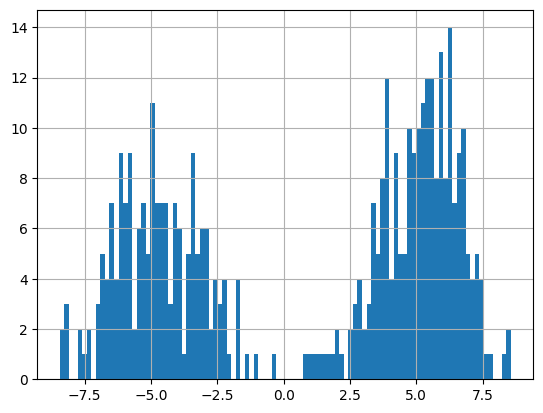

In [35]:
print("\n\n baseline logits: \n\n\n")
pd.concat([df_types[0]["pred_logits_1"]]).hist(bins=100);



 baseline logits: 





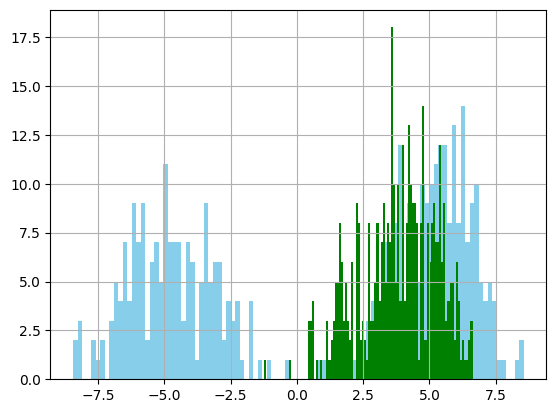

In [13]:
print("\n\n baseline logits: \n\n\n")
pd.concat([df_types[0]["pred_logits_1"]]).hist(bins=100, color="skyblue");
pd.concat([df_types[0]["pred_logits_flipped_1"]]).hist(bins=100, color="green");




 baseline logits: 





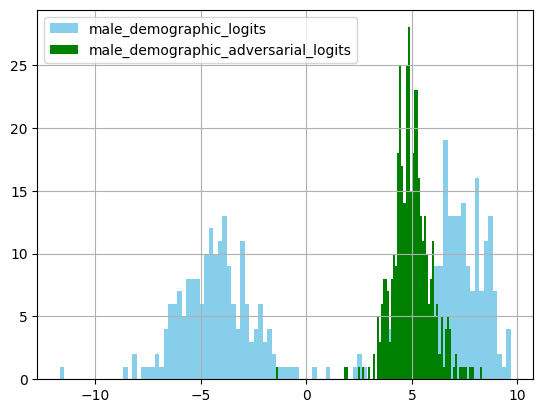

In [61]:
print("\n\n baseline logits: \n\n\n")
df_types[1].rename(columns={"pred_logits_1":"male_demographic_logits"})["male_demographic_logits"].hist(bins=100, color="skyblue", legend=True);
df_types[1].rename(columns={"pred_logits_flipped_1":"male_demographic_adversarial_logits"})["male_demographic_adversarial_logits"].hist(bins=100, color="green", legend=True);




 baseline logits: 





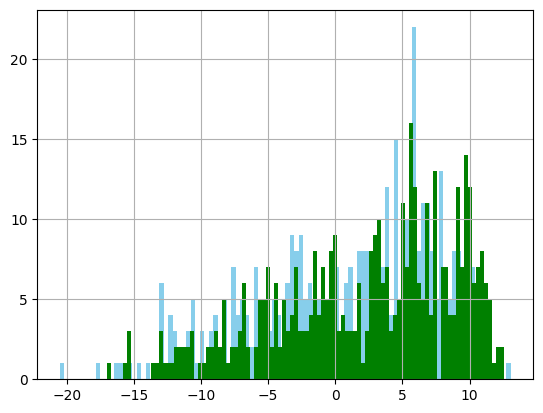

In [15]:
print("\n\n baseline logits: \n\n\n")
pd.concat([df_types[2]["pred_logits_1"]]).hist(bins=100, color="skyblue");
pd.concat([df_types[2]["pred_logits_flipped_1"]]).hist(bins=100, color="green");


In [ ]:
print("\n\n baseline logits: \n\n\n")
pd.concat([df_types[0]["pred_logits_0"],df_types[0]["pred_logits_1"]]).hist(bins=100, color="skyblue");
pd.concat([df_types[0]["pred_logits_flipped_0"],df_types[0]["pred_logits_flipped_1"]]).hist(bins=100, color="green");


In [77]:
test_data["y_pred"] = torch.sigmoid(torch.tensor(test_data["pred_logits_1"], dtype=torch.float)).numpy()
test_data["y_pred_flipped"] = torch.sigmoid(torch.tensor(test_data["pred_logits_flipped_1"], dtype=torch.float)).numpy()

In [52]:
df_types[0].rename(columns={"pred_logits_1":"baseline_logits"})["baseline_logits"]

0       6.937500
1       6.250000
2       5.875000
4       8.312500
5      -3.031250
          ...   
1235   -3.593750
1240   -2.828125
1244    5.406250
1246   -6.437500
1249    6.687500
Name: baseline_logits, Length: 414, dtype: float64



 baseline vs. male logits: 





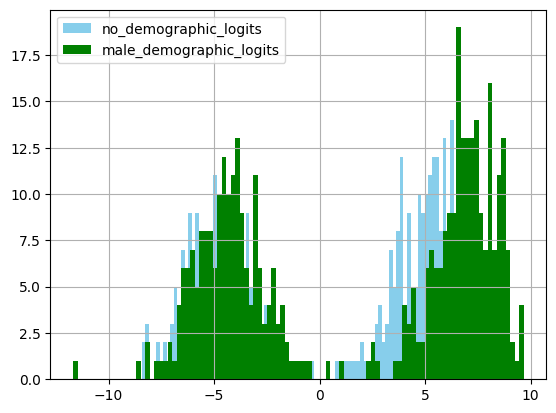

In [56]:
print("\n\n baseline model predictions: \n\n\n")
df_types[0].rename(columns={"pred_logits_1":"no_demographic_logits"})["no_demographic_logits"].hist(bins=100, color="skyblue", legend=True, );
df_types[1].rename(columns={"pred_logits_1":"male_demographic_logits"})["male_demographic_logits"].hist(bins=100, color="green", legend=True);



 baseline vs. male logits: 





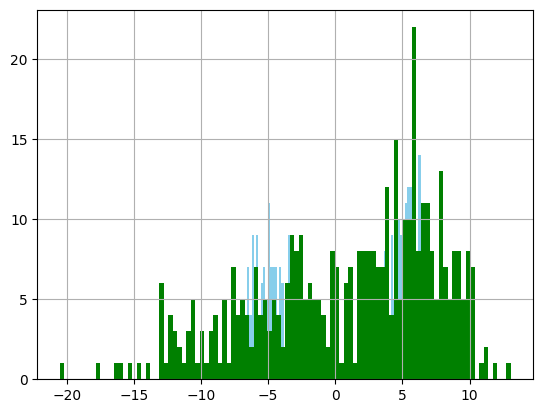

In [23]:
print("\n\n baseline vs. male logits: \n\n\n")
df_types[0]["pred_logits_1"].hist(bins=100, color="skyblue");
df_types[2]["pred_logits_1"].hist(bins=100, color="green");



 baseline vs. male logits: 





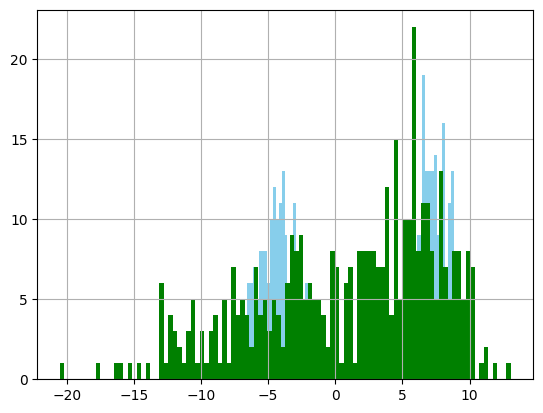

In [33]:
print("\n\n baseline vs. male logits: \n\n\n")
df_types[1]["pred_logits_1"].hist(bins=100, color="skyblue");
df_types[2]["pred_logits_1"].hist(bins=100, color="green");

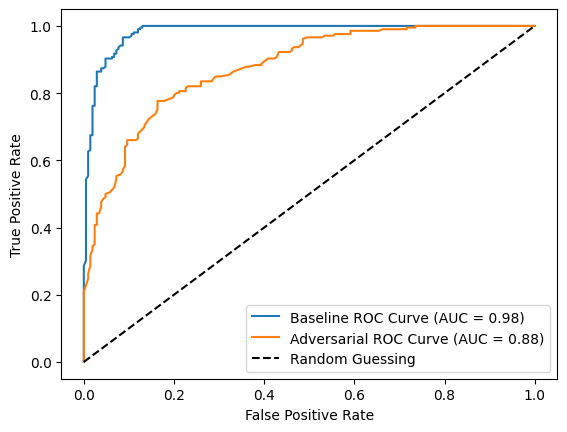

'\nauc = roc_auc_score(y_true=df_types[0]["label_int"], y_score=df_types[0]["y_pred"])\nfpr, tpr, thresholds = roc_curve(y_true=df_types[0]label_int"], y_score=df_types[0]["y_pred"])\nplt.plot(fpr, tpr, label=\'ROC Curve (AUC = %0.2f)\' % auc)\n'

In [71]:
auc = roc_auc_score(y_true=df_types[0]["label_int"], y_score=df_types[0]["y_pred"])
fpr, tpr, thresholds = roc_curve(y_true=df_types[0]["label_int"], y_score=df_types[0]["y_pred"])
plt.plot(fpr, tpr, label='Baseline ROC Curve (AUC = {:.2f})'.format(auc))


auc = roc_auc_score(y_true=df_types[0]["label_int"], y_score=df_types[0]["y_pred_flipped"])
fpr, tpr, thresholds = roc_curve(y_true=df_types[0]["label_int"], y_score=df_types[0]["y_pred_flipped"])
plt.plot(fpr, tpr, label='Adversarial ROC Curve (AUC = {:.2f})'.format(auc))

# Plot the diagonal line (slope = 1)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Show the plot
plt.show()

"""
auc = roc_auc_score(y_true=df_types[0]["label_int"], y_score=df_types[0]["y_pred"])
fpr, tpr, thresholds = roc_curve(y_true=df_types[0]label_int"], y_score=df_types[0]["y_pred"])
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
"""

In [30]:
kstest(df_types[0]["pred_logits_1"], df_types[1]["pred_logits_1"])

KstestResult(statistic=0.25633837582425334, pvalue=1.8579574211505426e-12, statistic_location=6.34375, statistic_sign=1)

In [31]:
kstest(df_types[0]["pred_logits_1"], df_types[2]["pred_logits_1"])

KstestResult(statistic=0.14798522307473713, pvalue=0.0001742974699340592, statistic_location=7.65625, statistic_sign=1)

In [32]:
kstest(df_types[1]["pred_logits_1"], df_types[2]["pred_logits_1"])

KstestResult(statistic=0.15918706168598826, pvalue=4.198342514341329e-05, statistic_location=6.0625, statistic_sign=-1)



 baseline vs. male logits: 





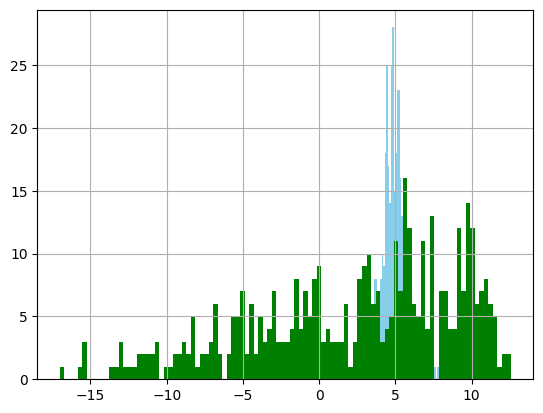

In [40]:
print("\n\n baseline vs. male logits: \n\n\n")
df_types[1]["pred_logits_flipped_1"].hist(bins=100, color="skyblue");
df_types[2]["pred_logits_flipped_1"].hist(bins=100, color="green");



metrics for female 




array([[181,  27],
       [  1, 205]])

0.9824029126213591
0.9323671497584541


metrics for male 




array([[190,  17],
       [  2, 202]])

0.9932154021028702
0.9537712895377128


metrics for baseline 




array([[179,  39],
       [ 20, 187]])

0.9054757789301068
0.8611764705882353


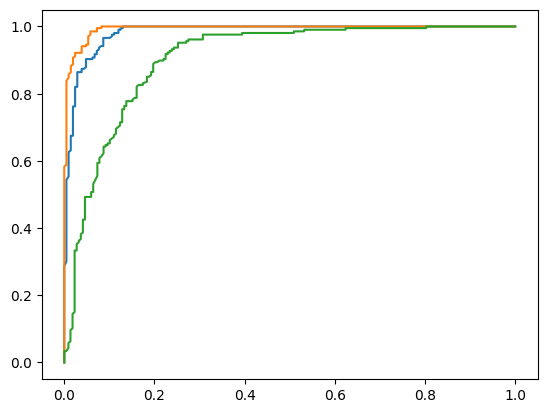

In [58]:
for gen in set(test_data["type"]):
    df = test_data[test_data['type'] == gen]
    print(f'\n\nmetrics for {gen} \n\n')
    display(confusion_matrix(y_pred=df["pred"], y_true=df["label_int"]))
    auc = roc_auc_score(y_true=df["label_int"], y_score=df["y_pred"])
    print(auc)
    fpr, tpr, thresholds = roc_curve(y_true=df["label_int"], y_score=df["y_pred"])
    plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
    print(accuracy_score(y_true=df["label_int"], y_pred=df["pred"]))



metrics for baseline 




array([[178,  40],
       [ 11, 196]])

0.9218078269733635
0.88


metrics for male 




array([[ 93, 114],
       [198,   6]])

0.37076110637491716
0.24087591240875914


metrics for female 




array([[185,  23],
       [ 30, 176]])

0.8769487490664675
0.8719806763285024


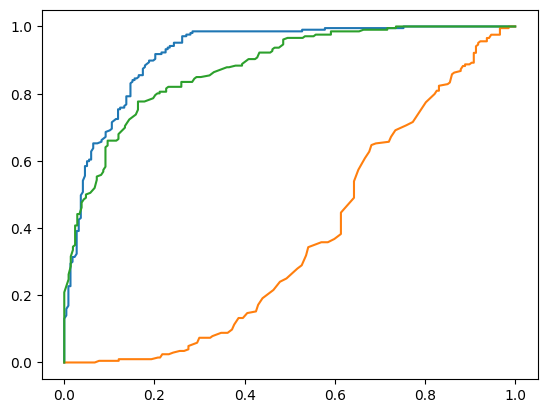

In [79]:
for gen in set(test_data["type"]):
    df = test_data[test_data['type'] == gen]
    print(f'\n\nmetrics for {gen} \n\n')
    display(confusion_matrix(y_pred=df["pred_flipped"], y_true=df["label_int"]))
    auc = roc_auc_score(y_true=df["label_int"], y_score=df["y_pred_flipped"])
    print(auc)
    fpr, tpr, thresholds = roc_curve(y_true=df["label_int"], y_score=df["y_pred_flipped"])
    plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
    print(accuracy_score(y_true=df["label_int"], y_pred=df["pred_flipped"]))

In [11]:
for df_ in df_types:
    print(f'{set(df_["type"])}: {kstest(df_["pred_logits_1"], df_["pred_logits_flipped_1"])}')

{'baseline'}: KstestResult(statistic=0.11529411764705882, pvalue=0.006997782154807813, statistic_location=8.125, statistic_sign=1)
{'male'}: KstestResult(statistic=0.45742092457420924, pvalue=3.795647625270243e-39, statistic_location=0.9765625, statistic_sign=1)
{'female'}: KstestResult(statistic=0.42995169082125606, pvalue=9.99938291642572e-35, statistic_location=-0.330078125, statistic_sign=1)


In [ ]:
### missing - don't flip outcome; subject relation, then object. female, arthritis -> outcome; male, female has counterfactual of influence. Given different subgroups, how does that affect pred. Some hidden characteristic Z with label flip. 
# access to weights is difficult and low chance; nuance picture of this
# Give model during training -> gender, race + insurance status; fine tune on that data; don't give insurance data; just race + gender. Don't include at inference time, it makes those assumptions.

0.9824029126213591
0.8769487490664675


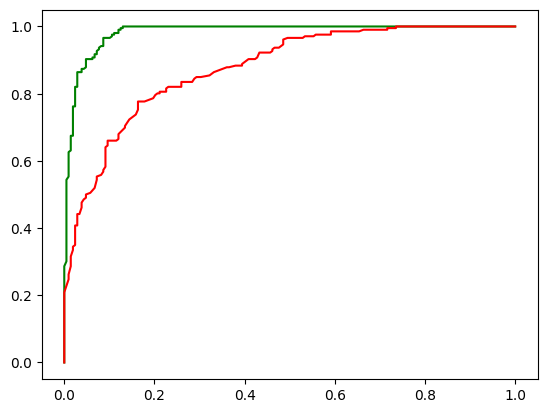

In [30]:
auc = roc_auc_score(y_true=df_types[0]["label_int"], y_score=df_types[0]["y_pred"])
print(auc)
fpr, tpr, thresholds = roc_curve(y_true=df_types[0]["label_int"], y_score=df_types[0]["y_pred"])
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc, color="green");
auc = roc_auc_score(y_true=df_types[0]["label_int"], y_score=df_types[0]["y_pred_flipped"])
print(auc)
fpr, tpr, thresholds = roc_curve(y_true=df_types[0]["label_int"], y_score=df_types[0]["y_pred_flipped"])
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc, color="Red");

0.9932154021028702
0.37076110637491716


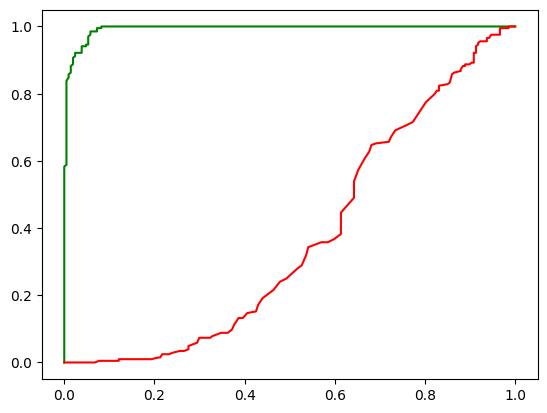

In [31]:
auc = roc_auc_score(y_true=df_types[1]["label_int"], y_score=df_types[1]["y_pred"])
print(auc)
fpr, tpr, thresholds = roc_curve(y_true=df_types[1]["label_int"], y_score=df_types[1]["y_pred"])
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc, color="green");
auc = roc_auc_score(y_true=df_types[1]["label_int"], y_score=df_types[1]["y_pred_flipped"])
print(auc)
fpr, tpr, thresholds = roc_curve(y_true=df_types[1]["label_int"], y_score=df_types[1]["y_pred_flipped"])
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc, color="Red");

0.9054757789301068
0.9218078269733635


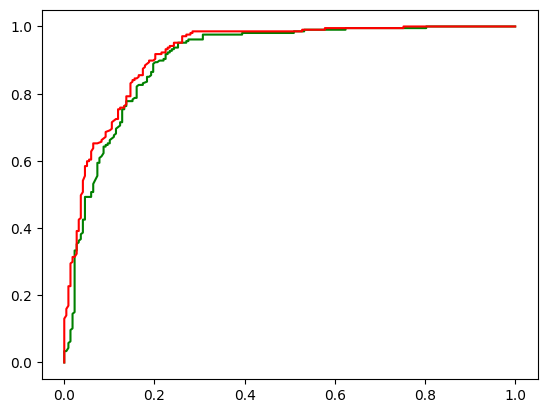

In [32]:
auc = roc_auc_score(y_true=df_types[2]["label_int"], y_score=df_types[2]["y_pred"])
print(auc)
fpr, tpr, thresholds = roc_curve(y_true=df_types[2]["label_int"], y_score=df_types[2]["y_pred"])
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc, color="green");
auc = roc_auc_score(y_true=df_types[2]["label_int"], y_score=df_types[2]["y_pred_flipped"])
print(auc)
fpr, tpr, thresholds = roc_curve(y_true=df_types[2]["label_int"], y_score=df_types[2]["y_pred_flipped"])
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc, color="Red");

In [36]:
test_data.groupby(["type"]).agg({"y_pred": np.mean, "y_pred_flipped": np.mean})

/var/folders/gr/87f53mgn7q9fpzc0nhzkr06h0000gn/T/ipykernel_42262/3207044643.py:1: FutureWarning: The provided callable <function mean at 0x10731d3a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  test_data.groupby(["type"]).agg({"y_pred": np.mean, "y_pred_flipped": np.mean})
/var/folders/gr/87f53mgn7q9fpzc0nhzkr06h0000gn/T/ipykernel_42262/3207044643.py:1: FutureWarning: The provided callable <function mean at 0x10731d3a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  test_data.groupby(["type"]).agg({"y_pred": np.mean, "y_pred_flipped": np.mean})


,y_pred,y_pred_flipped
type,,
baseline,0.598400,0.647625
female,0.568690,0.947056
male,0.556864,0.988075
